# Programming Assignment - 02
                                                                                              Rishabh Lingam

## Deliverable 5

In [1]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams.update({'font.size': 14})

In [2]:
credit_data = pd.read_csv('Credit_N400_p9.csv')
print("shape: {}".format(credit_data.shape))

shape: (400, 10)


In [3]:
credit_data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331


In [4]:
all_features = credit_data.columns[:-1]
prediction_variable =  credit_data.columns[-1]
quantitative_features = all_features[0:6]
qualitative_features = all_features[6:]
p = len(all_features)

In [5]:
credit_data.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580
3,148.924,9504,681,3,36,11,Female,No,No,964
4,55.882,4897,357,2,68,16,Male,No,Yes,331


In [6]:
# converting qualitative features into numerical values.
for feature in qualitative_features:
    credit_data[feature].replace(credit_data[feature].unique(), range(credit_data[feature].nunique()), inplace=True)

credit_data.describe()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.517500,0.100000,0.38750,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.000000,0.000000,0.00000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000,1999.000000


In [7]:
X = credit_data[all_features].to_numpy()
N, p = X.shape
Y = credit_data[prediction_variable].to_numpy().reshape(N, 1)

In [8]:
# utility methods

def error(X, Y, beta):
    return Y - np.matmul(X, beta)

def residual_sum_squares(X, Y, beta):
    e = error(X, Y, beta)
    return np.matmul(e.T, e)

def mean_squared_error(X, Y, beta):
    return residual_sum_squares(X, Y, beta) / len(X)

def standardize_data(data):
    rows, cols = data.shape
    for i in range(cols):
        data[:,i] = (data[:,i] - (data[:,i].mean())) / data[:,i].std()
    return data

def centralize_data(data):
    rows, cols = data.shape
    for i in range(cols):
        data[:,i] = (data[:,i] - (data[:,i].mean()))
    return data

In [9]:
# ridge regression

def ridge_regression(X, Y, learn_rate, penalty, max_itr):
    max_itr = 100000
    beta = np.random.rand(p).reshape(p, 1)
    for i in range(max_itr):
        e = error(X, Y, beta)
        partial_derv = -2 * (np.matmul(X.T, e) - (penalty * beta))
        beta = beta + ((-learn_rate) * partial_derv)
        beta = np.round(beta ,3)
    
    return beta

In [10]:
# k-fold cross validation

N, p = X.shape
k = 5
batch_size = len(X) // k
penalty_values = [0.01, 0.1, 1, 10, 100, 1000, 10000]
learn_rate = 0.00001
max_itr = 100000
beta_values = np.zeros((len(penalty_values), p))
mse_values = np.zeros((len(penalty_values), 1))

for j in range(len(penalty_values)):
    penalty = penalty_values[j]
    print("Penalty Value-> ", penalty)
    start = 0
    mse_s = []
    beta = 0
    
    # iterating for k folds
    for i in range(k):
        # seperating indices for training and validation.
        val_idx = range(start, start + batch_size)
        train_idx = [(i not in val_idx) for i in range(len(X))]
        
        # standardizing input and centralizing output before regression.
        beta = ridge_regression(standardize_data(X[train_idx]), centralize_data(Y[train_idx]), learn_rate, penalty, max_itr)
        mse = mean_squared_error(standardize_data(X[val_idx]), centralize_data(Y[val_idx]), beta)
        
        mse_s.append(mse)
        start = start + batch_size
    
    beta_values[j] = np.round(beta.T, 3)
    mse_values[j] = np.round(np.average(mse_s), 3)
    print("CV(5) Error-> ", mse_values[j])
    print()

Penalty Value->  0.01
CV(5) Error->  [10509.348]

Penalty Value->  0.1
CV(5) Error->  [10504.907]

Penalty Value->  1
CV(5) Error->  [10477.88]

Penalty Value->  10
CV(5) Error->  [11020.622]

Penalty Value->  100
CV(5) Error->  [29339.893]

Penalty Value->  1000
CV(5) Error->  [103524.54]

Penalty Value->  10000
CV(5) Error->  [185872.211]



## Deliverable 3

Smallest CV(5) error is generated by penalty = 1. Hence, it is the best-fit tuning parameter!

## Deliverable 1

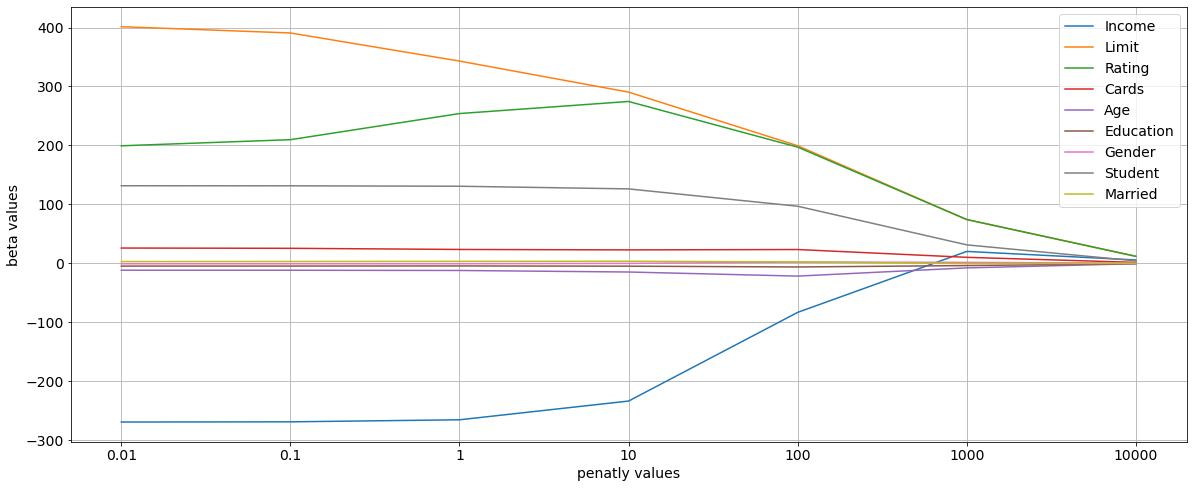

In [11]:
plt.figure(figsize=(20,8))

for i in range(p):
    plt.plot(beta_values[:,i], label = all_features[i])

plt.xlabel('penatly values')
plt.ylabel('beta values')
xlabels = [str(i) for i in penalty_values]
plt.xticks(range(len(xlabels)), xlabels)
plt.legend()
plt.grid(True)
plt.show()

## Deliverable 2

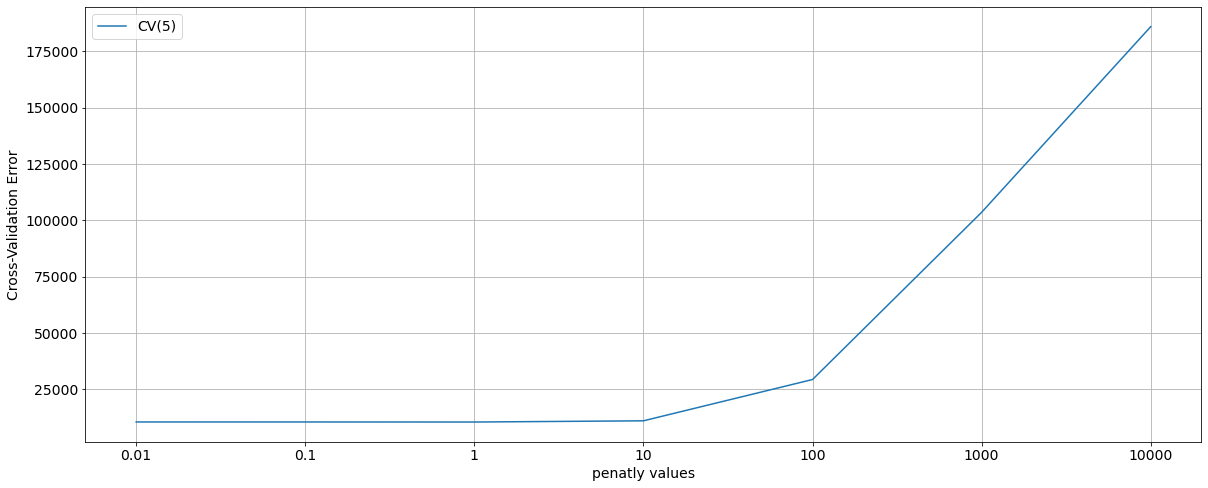

In [12]:
plt.figure(figsize=(20,8))

plt.plot(mse_values, label = "CV(5)")

plt.xlabel('penatly values')
plt.ylabel('Cross-Validation Error')
xlabels = [str(i) for i in penalty_values]
plt.xticks(range(len(xlabels)), xlabels)
plt.legend()
plt.grid(True)
plt.show()

## Deliverable 4

In [13]:
# taking penalty = 1 as best fit tuning parameter

best_penalty = 1

best_beta = ridge_regression(standardize_data(X), centralize_data(Y), learn_rate, best_penalty, max_itr)
print("The Best Fit model parameters are,")
for i in range(p):
    print("Coefficient of {} ->  {}".format(all_features[i], *best_beta[i]))

The Best Fit model parameters are,
Coefficient of Income ->  -270.836
Coefficient of Limit ->  355.26
Coefficient of Rating ->  256.24
Coefficient of Cards ->  20.834
Coefficient of Age ->  -11.349
Coefficient of Education ->  -2.896
Coefficient of Gender ->  -5.024
Coefficient of Student ->  126.818
Coefficient of Married ->  4.145


## Deliverable 6

In [14]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(alphas=penalty_values, cv=5).fit(standardize_data(X), centralize_data(Y))

best_penatly_skl = clf.alpha_
best_beta_skl = clf.coef_[0]

print("Best fit penalty value -> ", best_penatly_skl)
print()
print("The Best Fit model parameters are,")

for i in range(p):
    print("Coefficient of {} ->  {}".format(all_features[i], np.round(best_beta_skl[i], 3)))

Best fit penalty value ->  1.0

The Best Fit model parameters are,
Coefficient of Income ->  -270.621
Coefficient of Limit ->  368.635
Coefficient of Rating ->  242.299
Coefficient of Cards ->  21.465
Coefficient of Age ->  -11.235
Coefficient of Education ->  -3.032
Coefficient of Gender ->  -5.089
Coefficient of Student ->  126.889
Coefficient of Married ->  3.966


The cross-validation result of both manually implemented and library implemented ridge regression is same.
Both of them determined penalty factor of 1 as the optimal tuning parameter.

The Model Parameters of both implementations vary minimally. This variation can be associated to,
 - Different sampling technique employed.
 - Optimization algorithm used in SciKit Learn library.
 - Lesser iterations used in manual implementation.
 
By comparing the results, we can say that Manually Implemented Algorithm performed decently good.